In [2]:
import cv2
import os
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

2022-06-27 18:03:14.935569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/julian/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-27 18:03:14.935604: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
DIRDATA = './todaslascaras/prepro-2.0'
CATEGORIES = ["anger", "fear", "happy", "joy", "kiss", "neutral", "sadness", "surprise"]

NAME = "Faces-cnn-CV2-32x1-64x1-{}".format(int(time.time()))

TENSORBOARD = TensorBoard(log_dir='logs/{}'.format(NAME))

In [4]:
from sklearn.model_selection import train_test_split

data = []
label = []

for category in CATEGORIES:
    cpath = os.path.join(DIRDATA, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(cpath):
        image_array = cv2.imread(os.path.join(cpath, img), cv2.COLOR_RGB2GRAY)
        data.append(image_array)
        label.append(class_num)

data = np.asarray(data)
label = np.asarray(label)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, 8)
y_test = tf.keras.utils.to_categorical(y_test, 8)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3436, 120, 120, 3)
(3436, 8)
(860, 120, 120, 3)
(860, 8)


In [76]:
model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=data.shape[1:]),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128),
    layers.Dropout(0.5),  
    layers.Dense(8, activation='softmax')
])

In [77]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
history = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    batch_size=16, 
    epochs=30,
    callbacks=[TENSORBOARD]    
)

Epoch 1/30
215/215 [==============================] - 34s 156ms/step - loss: 5.9614 - accuracy: 0.2125 - val_loss: 1.8681 - val_accuracy: 0.2756
Epoch 2/30
215/215 [==============================] - 36s 169ms/step - loss: 1.8032 - accuracy: 0.3222 - val_loss: 1.5520 - val_accuracy: 0.4267
Epoch 3/30
215/215 [==============================] - 27s 127ms/step - loss: 1.6073 - accuracy: 0.4019 - val_loss: 1.3406 - val_accuracy: 0.5174
Epoch 4/30
215/215 [==============================] - 29s 134ms/step - loss: 1.5384 - accuracy: 0.4430 - val_loss: 1.4447 - val_accuracy: 0.4593
Epoch 5/30
215/215 [==============================] - 28s 128ms/step - loss: 1.1740 - accuracy: 0.5597 - val_loss: 1.1996 - val_accuracy: 0.6198
Epoch 6/30
215/215 [==============================] - 26s 122ms/step - loss: 1.1536 - accuracy: 0.5882 - val_loss: 1.5125 - val_accuracy: 0.4814
Epoch 7/30
215/215 [==============================] - 27s 125ms/step - loss: 1.2227 - accuracy: 0.5588 - val_loss: 0.9100 - val_ac

In [92]:
!mkdir -p saved_model
model.save('saved_model/my_model')

2022-06-25 14:06:04.341438: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [87]:
def imagen_entrada(path, shape):
        image = cv2.imread(path)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.03,
            minNeighbors=6,
            minSize=(30, 30)
        )
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), 0, 0)
            roi_color = image[y:y + h, x:x + w]
            # resize image
            output = cv2.resize(roi_color, shape)
            return output

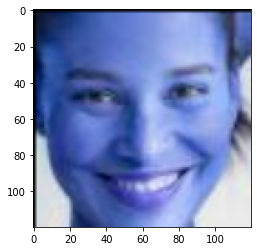

In [32]:
imagen_prueba = imagen_entrada('./todaslascaras/test/th-3957735366.jpg', (120, 120))

plt.imshow(imagen_prueba, cmap="gray")
plt.show()


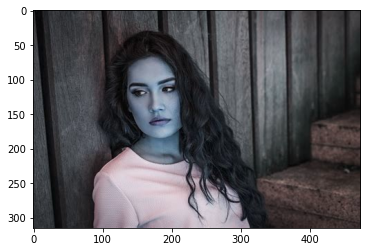

anger


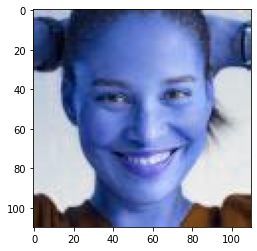

happy


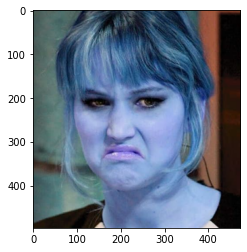

anger


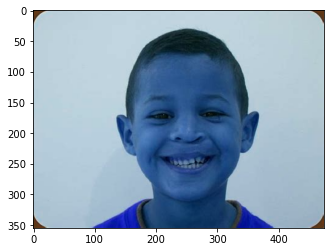

anger


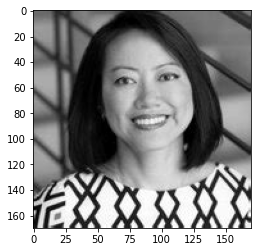

happy


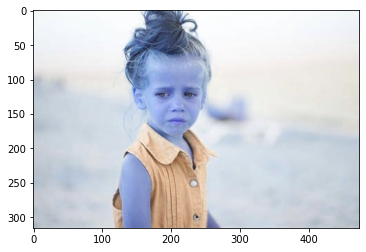

sadness


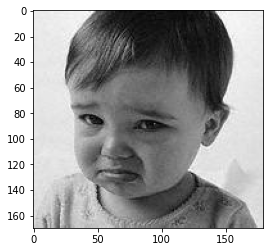

fear


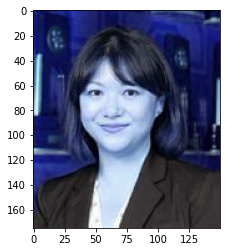

fear


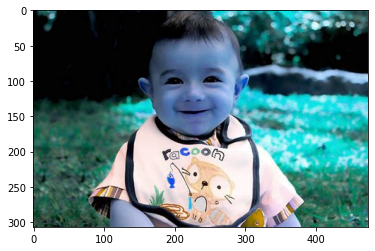

neutral


In [89]:
path = "./todaslascaras/test"
for i in os.listdir(path):
    imagen_prueba = imagen_entrada(path + '/' + i,  (120, 120))

    imagen_original = cv2.imread(path + '/' + i)
    plt.imshow(imagen_original)
    plt.show()


    x = image.img_to_array(imagen_prueba)
    x = np.expand_dims(x, axis=0)
    imagenes = np.vstack([x])
    val =  model.predict(imagenes)

    score = tf.nn.softmax(val[0]) # # get softmax for each output
    print(CATEGORIES[np.argmax(score)])

In [1]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

NameError: name 'tf' is not defined